# Dataset exploration

In [32]:
import os
import skimage
import numpy as np

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/pau/Projectes/tensorflow/tutorials/"
train_data_directory = os.path.join(ROOT_PATH, "datacamp-traffic-signs/Training")
test_data_directory = os.path.join(ROOT_PATH, "datacamp-traffic-signs/Testing")

images, labels = load_data(train_data_directory)

In [33]:
# inspecting data
images = np.asarray(images)
labels2 = np.asarray(labels)
print(images.ndim)
print(images.size)
images[0]


1
4575


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 254, 255],
        ...,
        [254, 255, 255],
        [254, 255, 255],
        [254, 255, 255]],

       [[255, 254, 255],
        [255, 254, 254],
        [255, 254, 254],
        ...,
        [255, 255, 254],
        [254, 255, 254],
        [254, 255, 254]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 254],
        ...,
        [255, 255, 254],
        [255, 255, 254],
        [255, 255, 254]],

       ...,

       [[255, 255, 253],
        [255, 255, 253],
        [255, 255, 254],
        ...,
        [152, 243, 255],
        [208, 255, 255],
        [238, 254, 252]],

       [[254, 254, 252],
        [254, 254, 252],
        [254, 255, 252],
        ...,
        [105, 185, 202],
        [195, 249, 255],
        [240, 255, 255]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 255],
        ...,
        [ 80, 152, 169],
        [155, 229, 240],
        [185, 248, 251]]

In [34]:
# Print the `labels` dimensions
print(labels2.ndim)

# Print the number of `labels`'s elements
print(labels2.size)

# Count the number of labels
print(len(set(labels2)))

1
4575
62


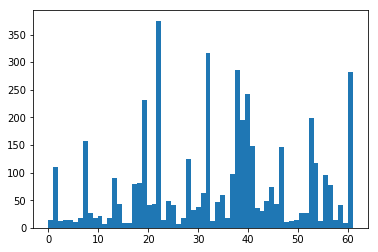

In [17]:
# Import the `pyplot` module
import matplotlib.pyplot as plt
%matplotlib inline

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

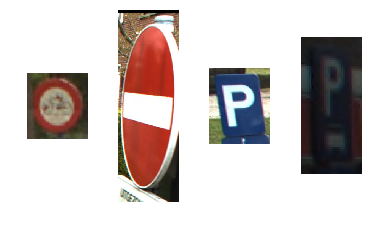

In [28]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

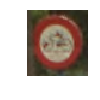

shape: (55, 51, 3), min: 14, max: 198


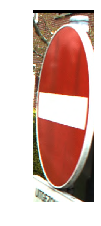

shape: (504, 160, 3), min: 0, max: 255


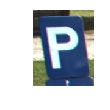

shape: (124, 100, 3), min: 11, max: 255


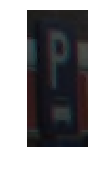

shape: (72, 32, 3), min: 6, max: 80


In [29]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}


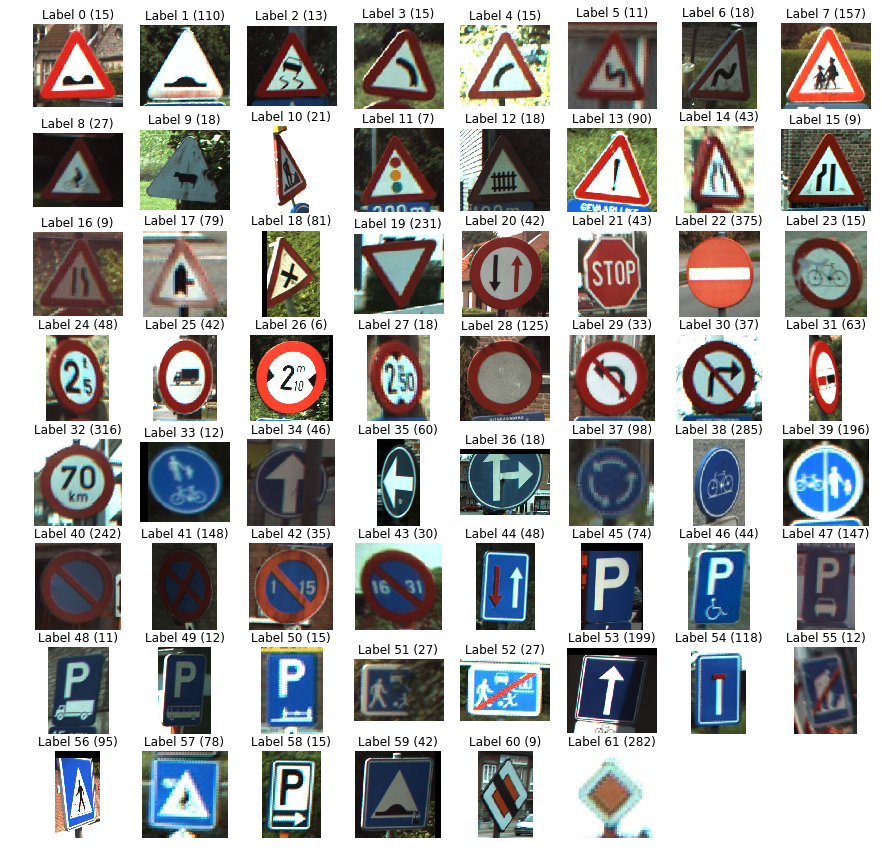

In [39]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)
print(unique_labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

# Feature extraction

In [41]:
# Import `tensorflow`
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


In [ ]:
# Import `tensorflow` 
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

## Rescaling

In [43]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

/home/pau/.pyenv/versions/3.6.4/envs/csn-project-python3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/pau/.pyenv/versions/3.6.4/envs/csn-project-python3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [45]:
images28 = np.array(images28)
print(images28.shape)

(4575, 28, 28, 3)


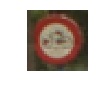

shape: (28, 28, 3), min: 0.07542892156862718, max: 0.7512467486994798


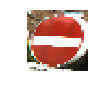

shape: (28, 28, 3), min: 0.034733893557425045, max: 1.0


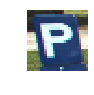

shape: (28, 28, 3), min: 0.08179271708683476, max: 1.0


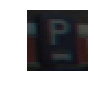

shape: (28, 28, 3), min: 0.036974789915966574, max: 0.31120448179271715


In [48]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

## Grayscale conversion

In [49]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
#images28 = np.array(images28) # already done

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

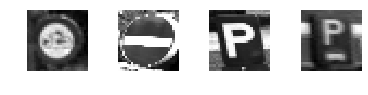

In [51]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

# Tensorflow

In [56]:
# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [57]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)
